# Public Transit Effects on Housing Values in Los Angeles County - Data Analysis

The following Jupyter Notebook analyses the data collected in the previous section of this project. 

To start, we import necessary tools and the data collected previously

In [1]:
#for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to reset how many max columns and rows I can see
pd.set_option('display.max_columns', None)

#to export dataframes as images
import dataframe_image as dfi

In [2]:
all_homes_df = pd.read_csv('Data/Zestimates for All Homes.csv' )
housetype_df = pd.read_csv('Data/Zestimates by House Type.csv')
bedroom_df = pd.read_csv('Data/Zestimates by Bedroom Num.csv')

## Checking the type for each variable


In [3]:
all_homes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72103 entries, 0 to 72102
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZIP                   72103 non-null  int64  
 1   City                  72103 non-null  object 
 2   Date                  72103 non-null  object 
 3   Zestimate             72103 non-null  int64  
 4   MetroLine             72103 non-null  object 
 5   StationStatus         72103 non-null  int64  
 6   LineType              72103 non-null  int64  
 7   LAT                   72103 non-null  float64
 8   LNG                   72103 non-null  float64
 9   TotalPopulation       72103 non-null  int64  
 10  PollutionBurdenScore  72103 non-null  float64
 11  Income                72103 non-null  int64  
 12  Homeownership         72103 non-null  float64
 13  Commute               72103 non-null  float64
 14  BachelorsEd           72103 non-null  float64
 15  Retail             

In [4]:
housetype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123966 entries, 0 to 123965
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ZIP                   123966 non-null  int64  
 1   City                  123966 non-null  object 
 2   Date                  123966 non-null  object 
 3   Zestimate             123966 non-null  int64  
 4   MetroLine             123966 non-null  object 
 5   StationStatus         123966 non-null  int64  
 6   LineType              123966 non-null  int64  
 7   LAT                   123966 non-null  float64
 8   LNG                   123966 non-null  float64
 9   TotalPopulation       123966 non-null  int64  
 10  PollutionBurdenScore  123966 non-null  float64
 11  Income                123966 non-null  int64  
 12  Homeownership         123966 non-null  float64
 13  Commute               123966 non-null  float64
 14  BachelorsEd           123966 non-null  float64
 15  

In [5]:
bedroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312656 entries, 0 to 312655
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ZIP                   312656 non-null  int64  
 1   City                  312656 non-null  object 
 2   Date                  312656 non-null  object 
 3   Zestimate             312656 non-null  int64  
 4   MetroLine             312656 non-null  object 
 5   StationStatus         312656 non-null  int64  
 6   LineType              312656 non-null  int64  
 7   LAT                   312656 non-null  float64
 8   LNG                   312656 non-null  float64
 9   TotalPopulation       312656 non-null  int64  
 10  PollutionBurdenScore  312656 non-null  float64
 11  Income                312656 non-null  int64  
 12  Homeownership         312656 non-null  float64
 13  Commute               312656 non-null  float64
 14  BachelorsEd           312656 non-null  float64
 15  

# Summary Statistics
The following shows and exports the summary statistics for each dataframe

In [6]:
#to save to local machine
dfi.export(all_homes_df.loc[:,'Zestimate':].describe().transpose().round(2),
           'Data/Table 1 - Summary Stats (Zestimates for All homes).png') 

#to show on Jupyter Notebooks
all_homes_df.loc[:,'Zestimate':].describe().transpose().round(2)

objc[21338]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4df53948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.114/Libraries/libGLESv2.dylib (0x10e0f4d18). One of the two will be used. Which one is undefined.
[0715/144701.737769:INFO:headless_shell.cc(660)] Written to file /var/folders/fh/4mx9rd494w5694_5mj_4gks00000gn/T/tmpls5jl7o1/temp.png.


,count,mean,std,min,25%,50%,75%,max
Zestimate,72103.0,619144.89,467576.02,97377.00,354823.50,507881.00,714899.50,6093126.00
StationStatus,72103.0,0.84,1.27,0.00,0.00,0.00,2.00,3.00
LineType,72103.0,0.97,1.11,0.00,0.00,0.00,2.00,3.00
LAT,72103.0,34.07,0.19,33.40,33.96,34.06,34.16,34.75
LNG,72103.0,-118.26,0.20,-118.85,-118.39,-118.27,-118.13,-117.71
TotalPopulation,72103.0,37331.55,20600.32,1733.00,23562.00,34401.00,47360.00,113184.00
PollutionBurdenScore,72103.0,6.01,1.11,2.75,5.42,5.90,6.70,9.44
Income,72103.0,80014.71,30462.54,21175.00,57411.00,75388.00,95212.00,222982.00
Homeownership,72103.0,0.48,0.21,0.04,0.33,0.49,0.66,0.92
Commute,72103.0,0.10,0.09,0.00,0.04,0.07,0.11,0.57


In [7]:
#to save to local machine
dfi.export(housetype_df.loc[:,'Zestimate':].describe().transpose().round(2),
           'Data/Table 2 - Summary Stats (Zestimates for Homes by House Type).png')

#to show on Jupyter Notebooks
housetype_df.loc[:,'Zestimate':].describe().transpose().round(2)


objc[21352]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4df53948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.114/Libraries/libGLESv2.dylib (0x10e2ced18). One of the two will be used. Which one is undefined.
[0715/144704.676285:INFO:headless_shell.cc(660)] Written to file /var/folders/fh/4mx9rd494w5694_5mj_4gks00000gn/T/tmpc0fejt77/temp.png.


,count,mean,std,min,25%,50%,75%,max
Zestimate,123966.0,762747.06,802786.06,70865.00,346482.75,512957.50,828979.25,10874066.00
StationStatus,123966.0,0.76,1.23,0.00,0.00,0.00,2.00,3.00
LineType,123966.0,0.91,1.10,0.00,0.00,0.00,2.00,3.00
LAT,123966.0,34.07,0.18,33.40,33.96,34.07,34.17,34.75
LNG,123966.0,-118.26,0.21,-118.85,-118.40,-118.29,-118.13,-117.71
TotalPopulation,123966.0,38550.96,20259.66,2314.00,24384.00,35671.00,47603.00,113184.00
PollutionBurdenScore,123966.0,5.97,1.03,3.03,5.41,5.89,6.62,9.44
Income,123966.0,82879.46,29653.63,21175.00,61394.00,78285.00,96432.00,222982.00
Homeownership,123966.0,0.50,0.19,0.04,0.36,0.51,0.66,0.92
Commute,123966.0,0.09,0.08,0.00,0.04,0.07,0.10,0.57


In [8]:
#to save to local machine
dfi.export(bedroom_df.loc[:,'Zestimate':].describe().transpose().round(2),
           'Data/Table 3 - Summary Stats (Zestimates for Homes by Num of Bedrooms).png')

#to show on Jupyter Notebooks
bedroom_df.loc[:,'Zestimate':].describe().transpose().round(2)

objc[21363]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4df53948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.114/Libraries/libGLESv2.dylib (0x10e9d5d18). One of the two will be used. Which one is undefined.
[0715/144706.379624:INFO:headless_shell.cc(660)] Written to file /var/folders/fh/4mx9rd494w5694_5mj_4gks00000gn/T/tmpxwncemyd/temp.png.


,count,mean,std,min,25%,50%,75%,max
Zestimate,312656.0,681068.12,640696.83,51466.00,338949.25,505041.00,764349.50,10874066.00
StationStatus,312656.0,0.83,1.27,0.00,0.00,0.00,2.00,3.00
LineType,312656.0,0.95,1.10,0.00,0.00,0.00,2.00,3.00
LAT,312656.0,34.07,0.18,33.40,33.95,34.07,34.16,34.75
LNG,312656.0,-118.26,0.20,-118.85,-118.40,-118.28,-118.14,-117.71
TotalPopulation,312656.0,38805.90,20634.44,1733.00,24468.00,35722.00,48761.00,113184.00
PollutionBurdenScore,312656.0,5.98,1.06,2.75,5.42,5.90,6.66,9.44
Income,312656.0,81162.26,30265.38,21175.00,58696.00,76088.00,96111.00,222982.00
Homeownership,312656.0,0.49,0.20,0.04,0.34,0.50,0.65,0.92
Commute,312656.0,0.09,0.08,0.00,0.04,0.07,0.11,0.57


# Distribution Plots

Note: Most of the output is cleared to reduce the file size (to make it uploadable on GitHub). To view all the graphs, run the following code on your machine. 

The graphs are also viewable/downloadable from this Github folder: https://github.com/jeremiasfv22/Zestimates-and-Public-Transit-in-LA-County/tree/main/Visualizations

In [9]:
#first split the housetype df and bedroom df to graph the qualities of each separately
sfh_df = housetype_df[housetype_df['HouseType']==1]
condo_df = housetype_df[housetype_df['HouseType']==0]

bed1_df = bedroom_df[bedroom_df['BedroomNum']==1]
bed2_df = bedroom_df[bedroom_df['BedroomNum']==2]
bed3_df = bedroom_df[bedroom_df['BedroomNum']==3]
bed4_df = bedroom_df[bedroom_df['BedroomNum']==4]
bed5_df = bedroom_df[bedroom_df['BedroomNum']==5]

#next, concatenate all the datasets into one and assign a dataset column to each
concatenated = pd.concat([all_homes_df.assign(dataset='all homes'),
                         sfh_df.assign(dataset='sf homes'),
                         condo_df.assign(dataset='condo homes'),
                         bed1_df.assign(dataset='1bed homes'),
                         bed2_df.assign(dataset='2bed homes'),
                         bed3_df.assign(dataset='3bed homes'),
                         bed4_df.assign(dataset='4bed homes'),
                         bed5_df.assign(dataset='5bed homes')])

#replace all NaN values with None
concatenated = concatenated.replace(np.nan, "-")

#reset_index
concatenated.reset_index(inplace=True, level=0, drop=True)


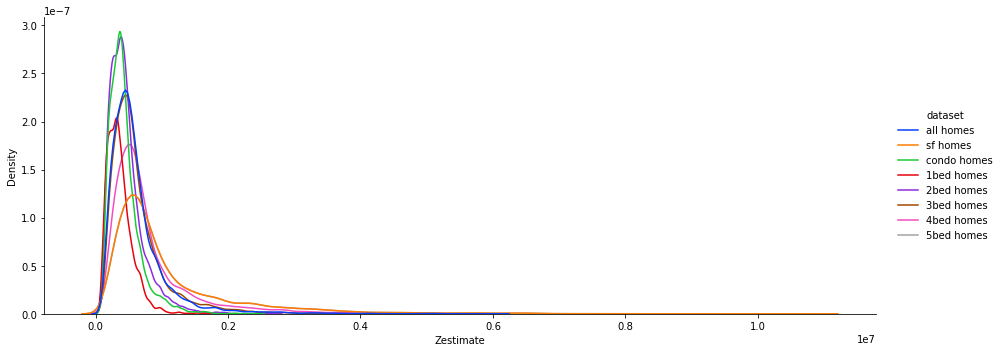

In [10]:
sns.displot(data=concatenated, x='Zestimate', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 1 - Zestimates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)


In [ ]:
sns.displot(data=concatenated, x='PollutionBurdenScore', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 2 - Pollution Burden Scores for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)


In [ ]:
sns.displot(data=concatenated, x='Income', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 3 - Median Incomes for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='Homeownership', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 4 - Homeownership Rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='Commute', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 5 - Non-automobile Commute Rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='BachelorsEd', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 6 - Bachelors Ed Rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='Retail', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 7 - Retail density for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='ParkAccess', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 8 - Park Access rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='TreeCanopy', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 9 - Tree Canopy per Zip rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='ViolentCrimeRate', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 10 - Violent Crime Rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [ ]:
sns.displot(data=concatenated, x='PropertyCrimeRate', hue='dataset', 
        kind='kde', fill=False, 
        palette=sns.color_palette('bright')[:8],
        height=5, aspect=2.5)

plt.savefig('Data/Graph 11 - Property Crime Rates for all datasets dist plot.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

As seen in the graphs above the following observations can be made:
- Most of our Zestimate observations throughout all the datasets have a value between 0 and 1 million 
- The mean pollution burden score for the datasets is around 6 (from a scale of 0 to 10).
- A large number of observations are in ZIP codes where the median annual income is between 50K-100K dollars per year. According to the HUD, the 2022 median family income for LA County was 91K dollars.
- The graph for homeownership rates has a lot of peaks, but a lot of the data seems to gravitate towards an average rate of around 50%. According to the Census Bureau, the homeownership rate in LA County was 46%.
- The average rate of non-automobile comuters per ZIP code is only around 5%. A very low number!
- The graph for percentage of population with at least a Bachelor's degree has a lot of peaks as well. However, most of the observations are in ZIP Codes that have a rate lower than 50%. 
- The retail density is mainly skewed towards the lower end of the data. 
- Park access per Zip code in LA County is skewed towards the higher end (which is surprising). This is interesting considering that Los Angeles is known to be very park poor (especially when you take the median income of a ZIP code into account). Many factors could deter people from using a park such as safety, maintenance, homelessness, ease of access to the public, etc. 
- Population-weighted percentage of ZIP Code with Tree Canopy skews towards the lower end of the data (expected).
- The mean violent crime rate is between 3 to 4 instances per 1000 people. 
- The mean property crime rate is skewed to around 15 instance per 1000 people. 

# Heatmaps / Correlation Graphs
Note: Similar to above, most of the output is cleared to reduce the file size (to make it uploadable on GitHub). To view all the graphs, run the following code on your machine. 

The graphs are also viewable/downloadable from this Github folder: https://github.com/jeremiasfv22/Zestimates-and-Public-Transit-in-LA-County/tree/main/Visualizations

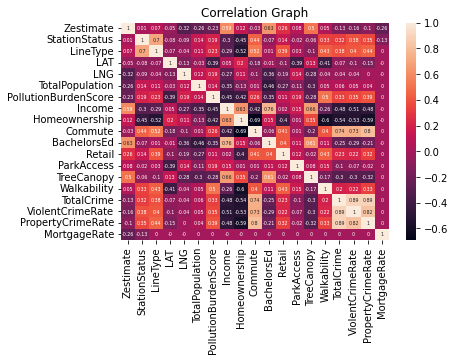

In [21]:
sns.heatmap(all_homes_df.loc[:,'Zestimate':].corr().round(2),annot=True,
           annot_kws={'size': 4.8},
           xticklabels=True, 
           yticklabels=True)
plt.title('Correlation Graph')
plt.savefig('Data/Graph 12 - Correlation Graph for All Homes Zestimates.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches='tight', 
                          pad_inches=0.1,
                          frameon=None,
                          cmap="YlGnBu",
                          metadata=None)

In [ ]:
sns.heatmap(housetype_df.loc[:,'Zestimate':].corr().round(2),annot=True,
           annot_kws={'size': 4.8},
           xticklabels=True, 
           yticklabels=True)
plt.title('Correlation Graph')
plt.savefig('Data/Graph 13 - Correlation Graph for Zestimates by House Type.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches='tight', 
                          pad_inches=0.1,
                          frameon=None,
                          cmap="YlGnBu",
                          metadata=None)

In [ ]:
sns.heatmap(bedroom_df.loc[:,'Zestimate':].corr().round(2),annot=True,
           annot_kws={'size': 4.8},
           xticklabels=True, 
           yticklabels=True)
plt.title('Correlation Graph')
plt.savefig('Data/Graph 14 - Correlation Graph for Zestimates by Bedroom Num.png', 
                          dpi=300,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches='tight', 
                          pad_inches=0.1,
                          frameon=None,
                          cmap="YlGnBu",
                          metadata=None)

Based on the correlation graphs above, it seems like the variables with themsot correlation are violent crime rates and property crime rates (expected) with a correlation coefficient of around 0.73-0.82 throughout the three graphs. Other than that, it seems like homeownership and income have a somewhat strong correlation (ranging from 0.62-0.63 throughout the graphs). Same with Bachelors Ed and Income (0.75-0.77 throughout the graphs). Other variables with strong correlation include commute and violent crime rates (ranging from 0.64-0.73), commute and property crime rates (ranging from 0.74-0.80), and tree conopy and income (ranging from 0.64-0.66). 

Variables with a relatively strong negative correlation include commute and homeownership (-0.67 to -0.69), and property crime rate with homeownership (-0.57 to -0.59).